# Data Generation

This notebook generates the data for the VRP instances.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

from pathlib import Path
from utils.data import generate_vrp_instance, solve
from utils.plot import plot_instance

## Test functions

In [2]:
instance = generate_vrp_instance(20)
instance.shape

(20, 3)

In [3]:
%%time
solution, solver = solve(instance)

CPU times: user 2.98 s, sys: 19.3 ms, total: 3 s
Wall time: 3.01 s


In [4]:
solution

{'vehicles_used': 3,
 'routes': {0: [13, 7, 2, 18, 14, 10, 15, 6],
  1: [8, 11, 9, 19, 1, 17, 4],
  2: [12, 3, 5, 16],
  3: [],
  4: []},
 'total_distance': 5807}

In [5]:
solver.print_solution()

Objective: 5807
Route for vehicle 0:
 0 Load(0) ->  13 Load(2) ->  7 Load(6) ->  2 Load(9) ->  18 Load(18) ->  14 Load(20) ->  10 Load(26) ->  15 Load(30) ->  6 Load(38) ->  0 Load(38)
Distance of the route: 2515m
Load of the route: 38

Route for vehicle 1:
 0 Load(0) ->  8 Load(2) ->  11 Load(6) ->  9 Load(12) ->  19 Load(20) ->  1 Load(28) ->  17 Load(35) ->  4 Load(39) ->  0 Load(39)
Distance of the route: 2233m
Load of the route: 39

Route for vehicle 2:
 0 Load(0) ->  12 Load(6) ->  3 Load(7) ->  5 Load(9) ->  16 Load(17) ->  0 Load(17)
Distance of the route: 1059m
Load of the route: 17

Route for vehicle 3:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 4:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Total distance of all routes: 5807m
Total load of all routes: 94


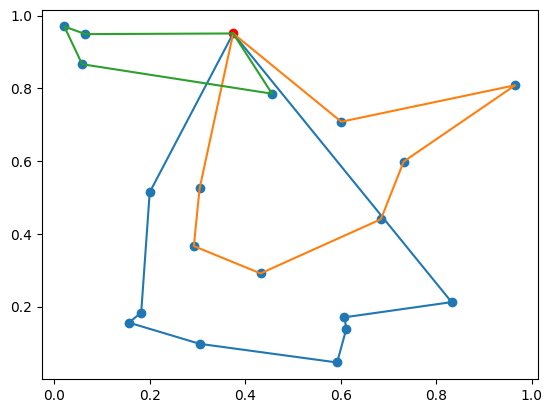

In [6]:
plot_instance(instance, solution['routes'])

## Create datasets

In [2]:
import torch

from utils.data import VRPData, load_pickle

In [3]:
results = load_pickle("data/vrp_20_nodes.pkl")

In [8]:
data = VRPData.load(results, k=3, normalize_demand=False, test_size=0.05)
data_norm = VRPData.load(results, k=3, normalize_demand=True, test_size=0.05)

In [12]:
torch.save(data, "data/vrp_20.pt")
torch.save(data_norm, "data/vrp_20_demand_norm.pt")